In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [3]:
input_data = pd.read_csv('netflix1.csv', parse_dates=['date_added'])

In [4]:
input_data.loc[4]

show_id                                                       s8
type                                                       Movie
title                                                    Sankofa
director                                            Haile Gerima
country                                            United States
date_added                                   2021-09-24 00:00:00
release_year                                                1993
rating                                                     TV-MA
duration                                                 125 min
listed_in       Dramas, Independent Movies, International Movies
Name: 4, dtype: object

In [5]:
input_data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
input_data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-06-07,2016,TV-Y7,1 Season,Kids' TV


In [7]:
def has_duplicates(data):
    for _ in data.columns:
        if len(data[_]) == len(set(data[_])):
            print(f'{_} column has NO duplicates.')
        else:
            print(f'{_} column has duplicates.')

In [8]:
has_duplicates(input_data)

show_id column has NO duplicates.
type column has duplicates.
title column has duplicates.
director column has duplicates.
country column has duplicates.
date_added column has duplicates.
release_year column has duplicates.
rating column has duplicates.
duration column has duplicates.
listed_in column has duplicates.


In [9]:
input_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [10]:
tmp_input_data = input_data.copy()

In [11]:
tmp_input_data['date_added_year'] = input_data['date_added'].dt.year
tmp_input_data['date_added_month'] = input_data['date_added'].dt.month
tmp_input_data['date_added_day'] =  input_data['date_added'].dt.day
tmp_input_data.drop('date_added',axis=1, inplace=True)

In [12]:
duration_list = tmp_input_data['duration'].unique()

In [13]:
tmp_input_data.head().T

,0,1,2,3,4
show_id,s1,s3,s6,s14,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Ganglands,Midnight Mass,Confessions of an Invisible Girl,Sankofa
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan,Bruno Garotti,Haile Gerima
country,United States,France,United States,Brazil,United States
release_year,2020,2021,2021,2021,1993
rating,PG-13,TV-MA,TV-MA,TV-PG,TV-MA
duration,90 min,1 Season,1 Season,91 min,125 min
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries","Children & Family Movies, Comedies","Dramas, Independent Movies, International Movies"
date_added_year,2021,2021,2021,2021,2021


In [14]:
len(input_data['director'].unique())

4528

In [15]:
def extract_number(text):
    match = re.search(r'\d+', str(text))
    return match.group() if match else None

In [16]:
tmp_input_data['duration'] = tmp_input_data['duration'].apply(extract_number)

In [17]:
tmp_input_data.head(2)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date_added_year,date_added_month,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24


In [18]:
def extract_duration(data):
    match = re.search(r'\d+', data['duration'])
    duration = int(match.group()) if match else 0
    if data['type'] == 'Movie':
        return pd.Series([duration, 0], index=['movie_duration', 'series_duration']) 
    else:
        return pd.Series([0, duration], index=['movie_duration', 'series_duration'])

In [19]:
tmp_input_data[['movie_duration','series_duration']] = tmp_input_data.apply(extract_duration, axis=1)
tmp_input_data.drop('duration', axis=1)

,show_id,type,title,director,country,release_year,rating,listed_in,date_added_year,date_added_month,date_added_day,movie_duration,series_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,2021,9,25,90,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,0,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,0,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,"Children & Family Movies, Comedies",2021,9,22,91,0
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,9,24,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,"International TV Shows, TV Dramas",2017,1,17,0,2
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,Kids' TV,2018,9,13,0,3
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,0,1
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,Kids' TV,2018,6,23,0,1


In [20]:
tmp_input_data.drop('duration', axis=1, inplace=True)

In [21]:
tmp_input_data.head()

,show_id,type,title,director,country,release_year,rating,listed_in,date_added_year,date_added_month,date_added_day,movie_duration,series_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,2021,9,25,90,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,0,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,0,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,"Children & Family Movies, Comedies",2021,9,22,91,0
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,9,24,125,0


In [22]:
tmp_input_data.rename(columns={'movie_duration':'movie_duration(mins)', 'series_duration':'series_duration(seasons)'}, inplace=True)

In [23]:
tmp_input_data.head().T

,0,1,2,3,4
show_id,s1,s3,s6,s14,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Ganglands,Midnight Mass,Confessions of an Invisible Girl,Sankofa
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan,Bruno Garotti,Haile Gerima
country,United States,France,United States,Brazil,United States
release_year,2020,2021,2021,2021,1993
rating,PG-13,TV-MA,TV-MA,TV-PG,TV-MA
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries","Children & Family Movies, Comedies","Dramas, Independent Movies, International Movies"
date_added_year,2021,2021,2021,2021,2021
date_added_month,9,9,9,9,9


In [30]:
movie_genres = list(tmp_input_data.listed_in.unique())

In [31]:
genre

['Documentaries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies, Comedies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Children & Family Movies, Comedies, Music & Musicals',
 'Dramas, International Movies',
 'Children & Family Movies, Music & Musicals',
 'Dramas, International Movies, Music & Musicals',
 'Movies',
 'Comedies',
 'Docuseries, Reality TV',
 'British TV Shows, Crime TV Shows, Docuseries',
 'Children & Family Movies',
 "Kids' TV",
 'Documentaries, International Movies',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Comedies, International Movies, Romantic Movies',
 'Horror Movies, Sci-Fi & Fantasy',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'TV Comedies',
 'International TV Shows, TV Dramas, TV Thrillers',
 'Reality TV',
 "Anime Series, Kids' TV",
 "Kids' TV, Korea

In [37]:
list_of_genres = set()  

for single_movie_genre in movie_genres:
    for single_genre in single_movie_genre.split(','):
        list_of_genres.add(single_genre.strip())  

spl_genre = list(spl_genre)

In [38]:
print(list_of_genres,len(list_of_genres))

{'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'Horror Movies', 'Children & Family Movies', 'Action & Adventure', 'TV Shows', 'Dramas', 'International TV Shows', 'TV Horror', 'Music & Musicals', 'Docuseries', 'Documentaries', 'LGBTQ Movies', 'Thrillers', 'TV Mysteries', 'TV Thrillers', 'Movies', 'Romantic Movies', 'TV Comedies', 'Teen TV Shows', "Kids' TV", 'Faith & Spirituality', 'Classic Movies', 'Science & Nature TV', 'Sci-Fi & Fantasy', 'Anime Series', 'Stand-Up Comedy', 'International Movies', 'Classic & Cult TV', 'Spanish-Language TV Shows', 'TV Sci-Fi & Fantasy', 'Comedies', 'TV Dramas', 'Crime TV Shows', 'Reality TV', 'Anime Features', 'Sports Movies', 'Romantic TV Shows', 'Cult Movies', 'Independent Movies', 'British TV Shows', 'Korean TV Shows'} 42


In [51]:
def column_creator(input_data, columns_to_create, default_value='No'):
    for each_column in columns_to_create:
        input_data[each_column]=default_value
    return input_data

def genre_categorizer(input_data, list_of_genres):
    for index, single_entry in input_data.iterrows():
        for single_genre in list_of_genres:
            match = re.search(single_genre, single_entry['listed_in'])
            if match:
                input_data.loc[index, single_genre] = 'Yes'

In [52]:
column_creator(tmp_input_data, list_of_genres)
genre_categorizer(tmp_input_data, list_of_genres)

In [54]:
tmp_input_data.head().T

,0,1,2,3,4
show_id,s1,s3,s6,s14,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Ganglands,Midnight Mass,Confessions of an Invisible Girl,Sankofa
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan,Bruno Garotti,Haile Gerima
country,United States,France,United States,Brazil,United States
release_year,2020,2021,2021,2021,1993
rating,PG-13,TV-MA,TV-MA,TV-PG,TV-MA
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries","Children & Family Movies, Comedies","Dramas, Independent Movies, International Movies"
date_added_year,2021,2021,2021,2021,2021
date_added_month,9,9,9,9,9


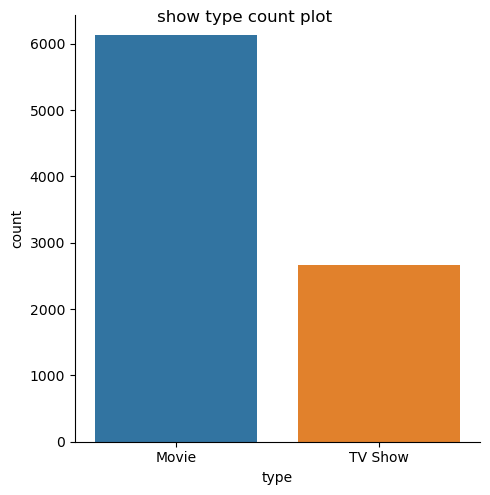

In [165]:
sns.catplot(kind='count',
           data=tmp_input_data,
           x='type',
           hue='type')

plt.suptitle('show type count plot')
plt.savefig('images/show type count');

In [59]:
data_cols = tmp_input_data.columns

In [60]:
data_cols[:10]

Index(['show_id', 'type', 'title', 'director', 'country', 'release_year',
       'rating', 'listed_in', 'date_added_year', 'date_added_month'],
      dtype='object')

In [86]:
lowercase_alpha = string.ascii_lowercase
uppercase_alpha = string.ascii_uppercase

In [98]:
title_alphabet_counter = {char:0 for char in string.ascii_uppercase}

In [94]:
print(title_starting_alpha)

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}


In [97]:
def title_beginning_word_counter(input_data, title_starting_alpha):
    def count_first_letter(title):
        first_char = title[0]
        if first_char in title_starting_alpha:
            title_starting_alpha[first_char] += 1
        elif first_char.lower() in title_starting_alpha:
            title_starting_alpha[first_char.lower()] += 1
    
    input_data['title'].apply(count_first_letter)

In [100]:
title_beginning_word_counter(tmp_input_data, title_alphabet_counter)

In [129]:
total_alphabet_count = pd.DataFrame(list(title_alphabet_counter.items()), columns=['Alphabet','Count'])

In [130]:
total_alphabet_count.head()

,Alphabet,Count
0,A,564
1,B,576
2,C,476
3,D,375
4,E,199


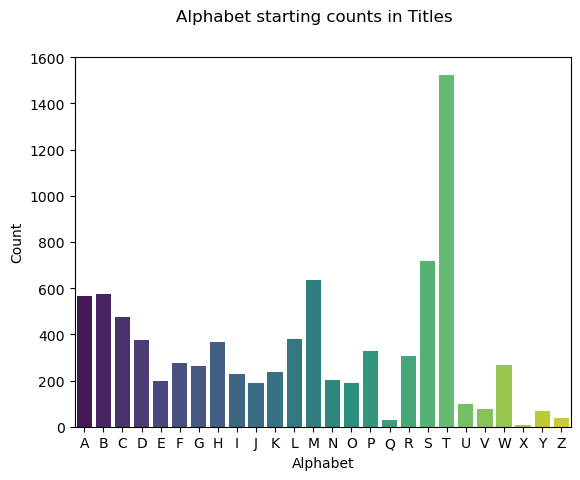

In [158]:
fig,ax =plt.subplots()
sns.barplot(data=total_alphabet_count,
           x='Alphabet',
            y='Count',
            palette='viridis',
           hue='Alphabet')
plt.suptitle('Alphabet starting counts in Titles')
plt.show()
fig.savefig('images/alphabet starting counts in titles')

In [166]:
data_cols

Index(['show_id', 'type', 'title', 'director', 'country', 'release_year',
       'rating', 'listed_in', 'date_added_year', 'date_added_month',
       'date_added_day', 'movie_duration(mins)', 'series_duration(seasons)',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure',
       'Horror Movies', 'Children & Family Movies', 'Action & Adventure',
       'TV Shows', 'Dramas', 'International TV Shows', 'TV Horror',
       'Music & Musicals', 'Docuseries', 'Documentaries', 'LGBTQ Movies',
       'Thrillers', 'TV Mysteries', 'TV Thrillers', 'Movies',
       'Romantic Movies', 'TV Comedies', 'Teen TV Shows', 'Kids' TV',
       'Faith & Spirituality', 'Classic Movies', 'Science & Nature TV',
       'Sci-Fi & Fantasy', 'Anime Series', 'Stand-Up Comedy',
       'International Movies', 'Classic & Cult TV',
       'Spanish-Language TV Shows', 'TV Sci-Fi & Fantasy', 'Comedies',
       'TV Dramas', 'Crime TV Shows', 'Reality TV', 'Anime Features',
       'Sports Movies', 'Romantic TV Show

In [170]:
tmp_input_data.rating.unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

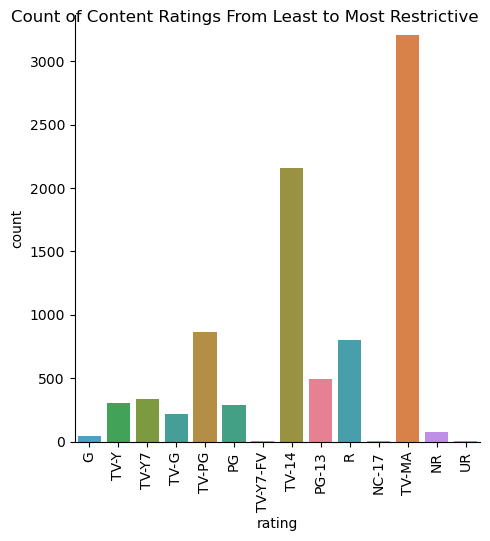

In [174]:
sns.catplot(kind='count',
           data=tmp_input_data,
           x='rating',
           hue='rating',
           order=['G', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'PG', 'TV-Y7-FV', 'TV-14', 'PG-13', 'R', 'NC-17', 'TV-MA', 'NR', 'UR'])

plt.xticks(rotation=90);
plt.suptitle('Count of Content Ratings From Least to Most Restrictive')
plt.savefig('images/Count of Content Ratings in TV Shows and Movies')

In [175]:
tmp_input_data.listed_in.

8790